<a href="https://colab.research.google.com/github/jessejk484/Jashwanthkalyan_INFO5731_SPRING2023/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [2]:
# Write your code here
import pandas as pd
import time
import nltk
import re
from google.colab import files
uploaded = files.upload()



Saving sentiment_reviews.csv to sentiment_reviews.csv


In [3]:
df=pd.read_csv('sentiment_reviews.csv')


In [4]:
import nltk   #cleaning
df['cleaned_txt'] = df['cleaned_txt'].str.replace('[^\w\s]','')  #removal of punctuation
df['cleaned_txt'] = df['cleaned_txt'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['cleaned_txt'] = df['cleaned_txt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

<ipython-input-4-7dcb25cb1f72>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_txt'] = df['cleaned_txt'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,Document ID,cleaned_txt,Sentiment
0,0,0,reference rating movie despicable star despica...,Positive
1,1,1,going watch future best animated picture winne...,Positive
2,2,2,minion rise gru follows year old gru voiced st...,Negative
3,3,3,im sure movie doesnt higher rating found reall...,Negative
4,4,4,fun movie minion scene gru thankfully chemistr...,Positive


In [5]:
df_copy = df.copy()

In [6]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['cleaned_txt']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [89]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

def docLda(corpus, lda_model):
  return lda_model[corpus]


pprint(lda_model.print_topics(num_topics = 10, num_words = 5))
doc_lda = lda_model[corpus]

[(0,
  '0.019*"movie" + 0.011*"minion" + 0.009*"character" + 0.007*"joke" + '
  '0.007*"well"'),
 (1,
  '0.016*"minion" + 0.016*"movie" + 0.013*"gru" + 0.012*"film" + 0.009*"make"'),
 (2,
  '0.010*"minion" + 0.009*"movie" + 0.007*"kid" + 0.006*"want" + 0.006*"get"'),
 (3,
  '0.018*"minion" + 0.013*"like" + 0.012*"time" + 0.011*"movie" + 0.011*"gru"'),
 (4,
  '0.019*"movie" + 0.018*"gru" + 0.014*"minion" + 0.009*"make" + '
  '0.009*"character"'),
 (5,
  '0.020*"gru" + 0.017*"movie" + 0.013*"minion" + 0.010*"kid" + 0.008*"film"'),
 (6,
  '0.015*"movie" + 0.011*"minion" + 0.010*"gru" + 0.007*"get" + 0.006*"many"'),
 (7,
  '0.008*"movie" + 0.007*"like" + 0.007*"film" + 0.007*"minion" + 0.006*"get"'),
 (8,
  '0.026*"movie" + 0.023*"minion" + 0.017*"gru" + 0.008*"despicable" + '
  '0.008*"film"'),
 (9,
  '0.020*"minion" + 0.015*"movie" + 0.015*"film" + 0.011*"gru" + '
  '0.010*"character"')]


In [90]:
docLda = docLda(corpus, lda_model)


In [91]:
docLda

In [92]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=words, 
                                     dictionary=dictionary,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.675012440402645

Coherence Score:  0.2186728453841099


In [93]:
lsamodel = models.LsiModel(corpus,
                           num_topics = 20, 
                           id2word = dictionary)

In [94]:
pprint(lsamodel.print_topics(num_topics = 20))


[(0,
  '0.344*"movie" + 0.249*"minion" + 0.245*"like" + 0.239*"gru" + 0.198*"film" '
  '+ 0.193*"character" + 0.179*"well" + 0.157*"voice" + 0.156*"get" + '
  '0.151*"moment"'),
 (1,
  '0.475*"gru" + 0.290*"minion" + 0.189*"make" + 0.176*"villain" + '
  '0.160*"rise" + -0.157*"like" + -0.144*"moment" + 0.122*"wild" + '
  '-0.121*"voice" + -0.112*"quite"'),
 (2,
  '0.279*"minion" + -0.249*"gru" + -0.194*"make" + 0.189*"despicable" + '
  '0.186*"franchise" + 0.173*"one" + 0.161*"movie" + -0.132*"knuckle" + '
  '0.125*"good" + -0.124*"wild"'),
 (3,
  '0.406*"movie" + -0.282*"one" + -0.212*"film" + -0.192*"franchise" + '
  '0.175*"despicable" + -0.165*"character" + 0.127*"good" + 0.118*"review" + '
  '-0.117*"worth" + 0.116*"villain"'),
 (4,
  '0.168*"even" + 0.153*"franchise" + -0.139*"story" + 0.130*"good" + '
  '-0.130*"movie" + -0.129*"action" + -0.128*"join" + -0.121*"kid" + '
  '-0.117*"new" + 0.117*"make"'),
 (5,
  '-0.306*"get" + 0.186*"movie" + 0.183*"despicable" + 0.165*"enough" 

In [95]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus,
                          num_topics = 20,
                          id2word = dictionary)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = df['cleaned_txt'],
                                  dictionary = dictionary,
                                  coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [96]:
!pip install biterm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

In [99]:
biterm = df['cleaned_txt'].head(100).values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(biterm).toarray()


text = np.array(vector.get_feature_names_out())
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)


topic_summuary(model.phi_wz.T, X_tfidf, text, 10)

100%|██████████| 10/10 [04:24<00:00, 26.47s/it]


Topic 0 | Coherence=-18.67 | Top words= grus pretty film brand new reference moment line baddie minion
Topic 1 | Coherence=-12.09 | Top words= worth seeing action member trejo im background used fogel thats
Topic 2 | Coherence=-23.28 | Top words= join minion gru film steve van damme carrell voiced arkin
Topic 3 | Coherence=-31.28 | Top words= better minion movie great animation kid like story funny comedy
Topic 4 | Coherence=-31.93 | Top words= movie minion best missing kid grus time voice review joke
Topic 5 | Coherence=14.90 | Top words= currently jones quirk world installment awwwww ultimate void revisit pierre
Topic 6 | Coherence=-26.94 | Top words= movie minion gru dont watch despicable hard little like franchise
Topic 7 | Coherence=-27.16 | Top words= movie minion reference work best watching check isnt story rise
Topic 8 | Coherence=-17.73 | Top words= feel completely gru predictable appreciate slapstick moment disney time task
Topic 9 | Coherence=21.30 | Top words= yeoh second 

{'coherence': [-18.66841222832636,
  -12.08716109649399,
  -23.283229292057666,
  -31.27705891616037,
  -31.930549427082145,
  14.895888865349647,
  -26.9445826676104,
  -27.158811449335467,
  -17.72813812560785,
  21.30411252718454],
 'top_words': [array(['grus', 'pretty', 'film', 'brand', 'new', 'reference', 'moment',
         'line', 'baddie', 'minion'], dtype=object),
  array(['worth', 'seeing', 'action', 'member', 'trejo', 'im', 'background',
         'used', 'fogel', 'thats'], dtype=object),
  array(['join', 'minion', 'gru', 'film', 'steve', 'van', 'damme',
         'carrell', 'voiced', 'arkin'], dtype=object),
  array(['better', 'minion', 'movie', 'great', 'animation', 'kid', 'like',
         'story', 'funny', 'comedy'], dtype=object),
  array(['movie', 'minion', 'best', 'missing', 'kid', 'grus', 'time',
         'voice', 'review', 'joke'], dtype=object),
  array(['currently', 'jones', 'quirk', 'world', 'installment', 'awwwww',
         'ultimate', 'void', 'revisit', 'pierre'], 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [111]:
# Write your code here

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df_copy = pd.read_csv('https://raw.githubusercontent.com/jessejk484/Jashwanthkalyan_INFO5731_SPRING2023/main/sentiment_reviews.csv')
df_copy.head()



,Unnamed: 0,Document ID,cleaned_txt,Sentiment
0,0,0,reference rating movie despicable star despica...,Positive
1,1,1,going watch future best animated picture winne...,Positive
2,2,2,minion rise gru follows year old gru voiced st...,Negative
3,3,3,im sure movie doesnt higher rating found reall...,Negative
4,4,4,fun movie minion scene gru thankfully chemistr...,Positive


In [101]:
df_copy['Sentiment'].value_counts()


Positive    13
Negative    10
Name: Sentiment, dtype: int64

In [112]:
import nltk   #cleaning
df_copy['cleaned_txt'] = df_copy['cleaned_txt'].str.replace('[^\w\s]','')  #removal of punctuation
df_copy['cleaned_txt'] = df_copy['cleaned_txt'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df_copy['cleaned_txt'] = df_copy['cleaned_txt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_copy.head()

<ipython-input-112-d868f6185109>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['cleaned_txt'] = df_copy['cleaned_txt'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Document ID,cleaned_txt,Sentiment
0,0,0,reference rating movie despicable star despica...,Positive
1,1,1,going watch future best animated picture winne...,Positive
2,2,2,minion rise gru follows year old gru voiced st...,Negative
3,3,3,im sure movie doesnt higher rating found reall...,Negative
4,4,4,fun movie minion scene gru thankfully chemistr...,Positive


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(df_copy['cleaned_txt'])
print(X_tfidf.shape)

(23, 1260)


In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    df_copy['Sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)
model_mnb = mnb.fit(x_train,y_train)

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.6
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print("using MNB",scores.mean())

using MNB 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [119]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)

In [120]:
classification_report(y_test,y_pred_svm)

'              precision    recall  f1-score   support\n\n    Negative       0.00      0.00      0.00         2\n    Positive       0.50      0.67      0.57         3\n\n    accuracy                           0.40         5\n   macro avg       0.25      0.33      0.29         5\nweighted avg       0.30      0.40      0.34         5\n'

In [121]:
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))


Accuracy 0.4


In [122]:
scores = cross_val_score(svm, x_test, y_test, cv=3)
print("using svm",scores.mean())

using svm 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [57]:
# Write your code here

uploaded = files.upload()


Saving test.csv to test.csv


In [58]:
test = pd.read_csv("test.csv")

In [59]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
uploaded = files.upload()

Saving train.csv to train.csv


In [61]:
train = pd.read_csv("train.csv")

In [62]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
!pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=12068468 sha256=1aa59352f9fd8e55664614e770593e6679f381460c41c014f79fcb18a2abc5a7
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplot

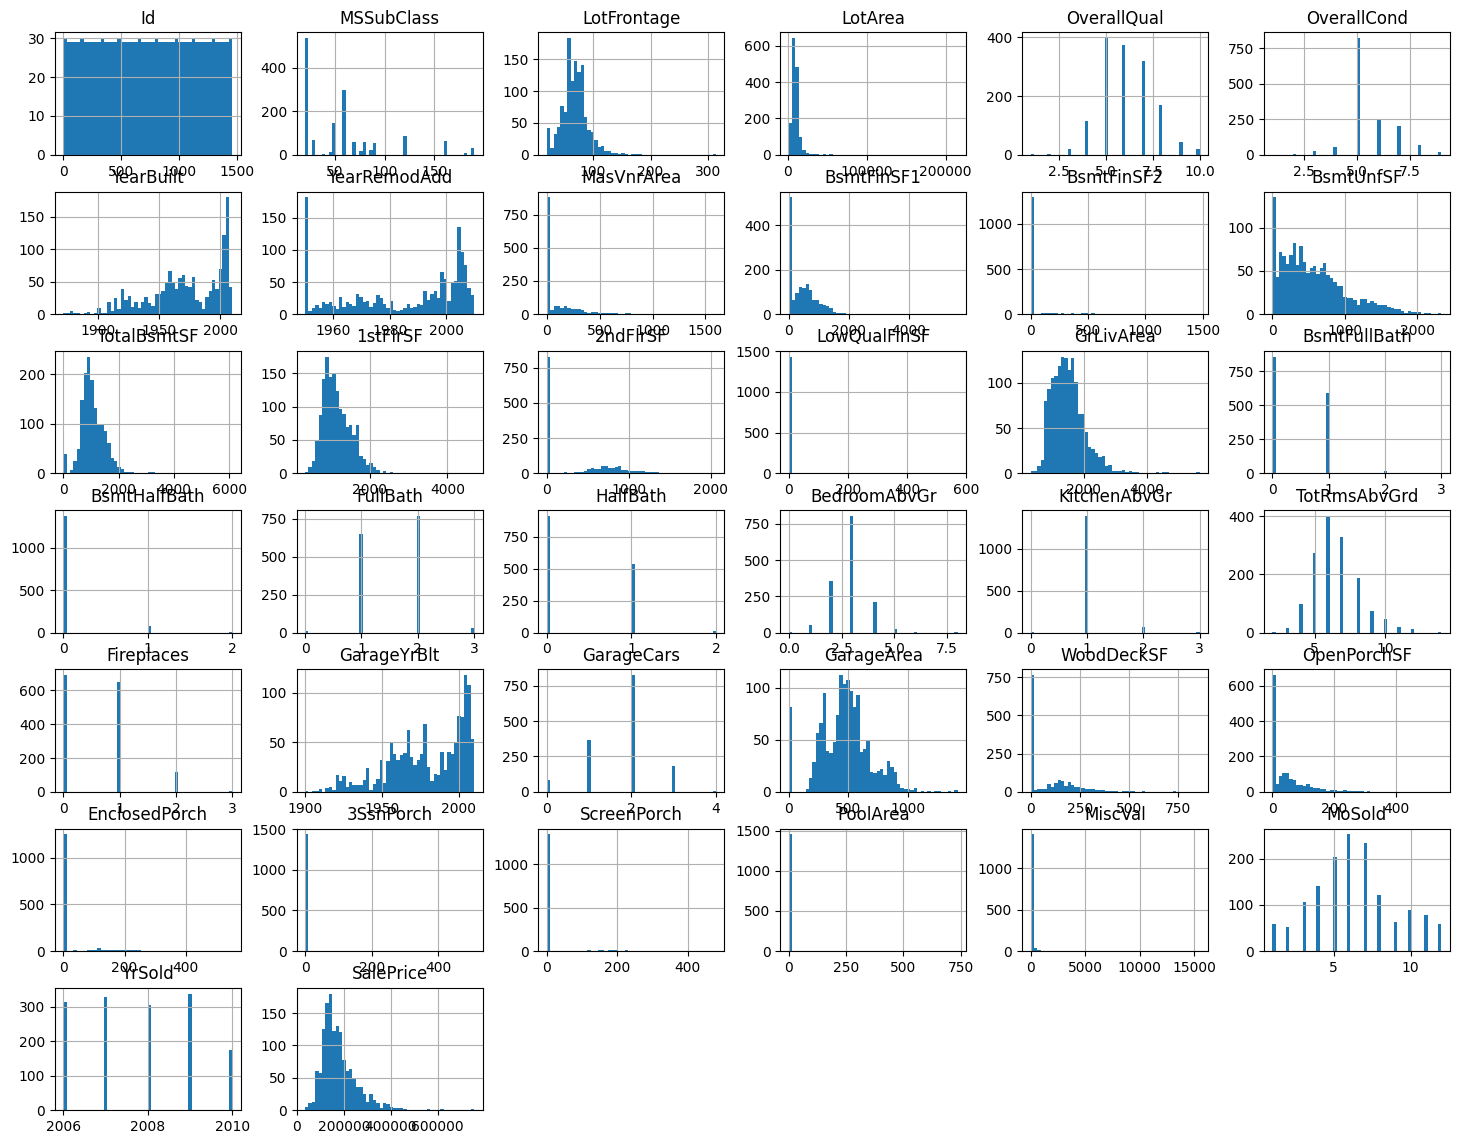

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(18,14))
plt.show()

In [71]:
cor = train.corr()
cor.head()

<ipython-input-71-2b853153268a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [72]:
cor["YrSold"].sort_values(ascending=False)


YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
LotFrontage      0.007450
MiscVal          0.004906
Id               0.000712
GarageYrBlt     -0.001014
MasVnrArea      -0.008201
EnclosedPorch   -0.009916
HalfBath        -0.010269
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

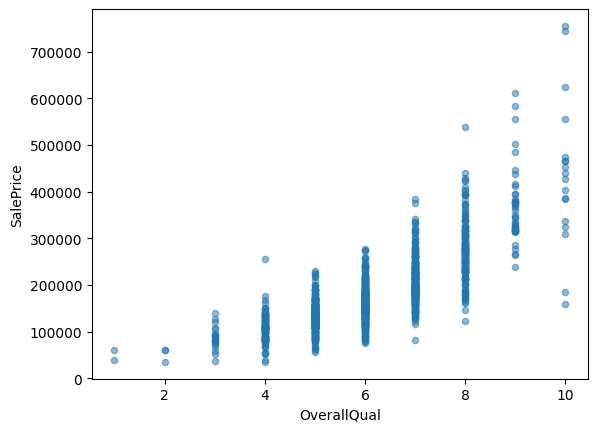

In [73]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

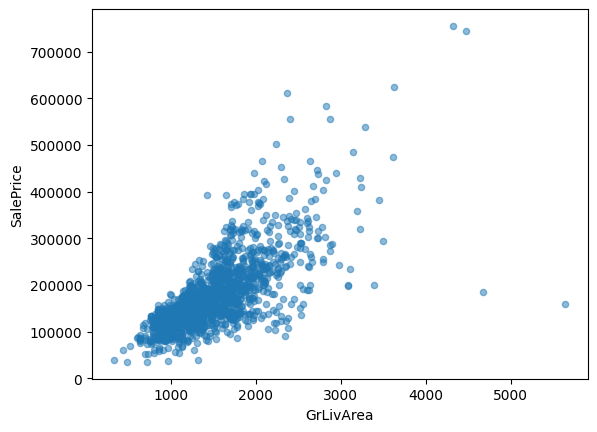

In [74]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)


<Axes: xlabel='GarageCars', ylabel='SalePrice'>

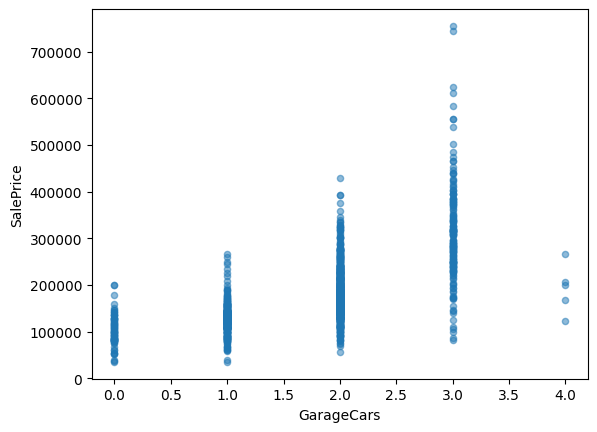

In [75]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)


<Axes: >

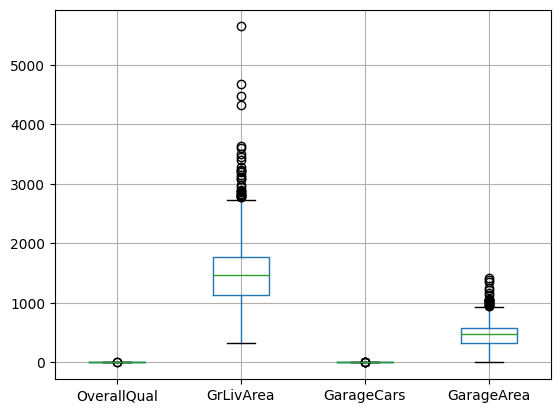

In [76]:
train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])


<Axes: >

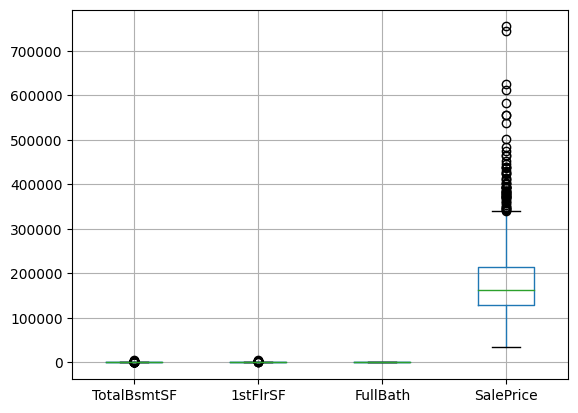

In [77]:
train.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])


In [78]:
import numpy as np
train.fillna(-1000, inplace=True)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond',
           'LandContour', 
           'RoofStyle', 
           'RoofMatl', 
           'Heating', 
           'MiscFeature', 
           'SaleType', 
           'GarageType',
           'Electrical', 
           'SaleCondition', 
           'Foundation',
           'Exterior1st', 
           'Exterior2nd',
           'MasVnrType', 
           'FireplaceQu', 
           'LotShape', 
           'Neighborhood', 
           'Condition1', 
           'Condition2', 
           'Utilities', 
           'BldgType', 
           'HouseStyle',
           'PoolQC', 
           'BsmtQual', 
           'BsmtCond', 
           'GarageQual',
           'BsmtExposure', 
           'ExterQual', 
           'ExterCond',
           'HeatingQC', 
           'KitchenQual', 
           'BsmtFinType1',
           'BsmtFinType2', 
           'Functional', 
           'Fence', 
           'GarageFinish', 
           'LandSlope',
           'LotShape', 
           'PavedDrive', 
           'Street',
           'Alley', 
           'CentralAir', 
           'MSSubClass', 
           'OverallCond', 
           'YrSold',
           'MoSold', 
           'MSZoning',
           'LotConfig')

In [80]:
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train[i].values))
    train[i] = encoder.transform(list(train[i].values))

In [82]:
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test[j].values))
    test[j] = encoder_test.transform(list(test[j].values))

In [83]:
x_train = train[train.columns[:80]]
y_train = train['YrSold']
x_validation = test[test.columns[:80]]

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [85]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(-1000, inplace=True)

In [86]:
predicted = regressor.predict(x_train)


In [87]:
predictedValues = pd.DataFrame({"Predicted Values": predicted})

In [88]:
predictedValues

,Predicted Values
0,2.000000e+00
1,1.000000e+00
2,2.000000e+00
3,-1.454664e-13
4,2.000000e+00
...,...
1455,1.000000e+00
1456,4.000000e+00
1457,4.000000e+00
1458,4.000000e+00
